# Examen 3

Para el desarrollo del tercer examen, usar los datos del archivo “Ex_1” para las preguntas del 01 al 03, mientras que para las preguntas 04 al 06 usar el archivo usar el archivo “Ex_2”, mientras que para las preguntas 07 y 08 usar el archivo “Ex_3”. Finalmente, para las preguntas 09 y 10 se va modificar el script del ejercicio de la Sesión 04 del Módulo 06, simular el modelo modificando el umbral de los coeficiente rugosidad, (umbral mínimo 0.06 y umbral máximo 0.08) para las llanuras izquierda y derecha.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio
import geopandas as gpd

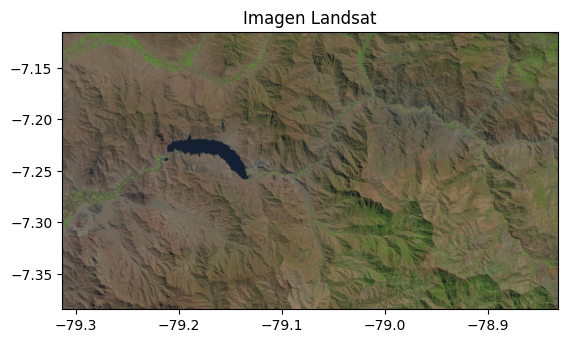

In [17]:
# 1. Obtener una gráfica que muestre el raster con una leyenda que indique el rango de los valores.
img1 = rasterio.open('./Data Examen 3/Ex_1/Rst/landsatImage.tif')
from rasterio import plot


# Crear una gráfica con una leyenda que indique el rango de los valores
fig, ax = plt.subplots()
plot.show(img1, ax=ax, cmap='viridis')
plt.title('Imagen Landsat')

# # Añadir barra de color para indicar el rango de los valores
# cbar = fig.colorbar(ax.images, ax=ax)
# cbar.set_label('Value Range')

# Mostrar la gráfica
plt.show()


In [14]:
img1.colorinterp

(<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>)

In [ ]:
[i for i in zip(img1.indexes, img1.colorinterp)]

[(1, <ColorInterp.red: 3>),
 (2, <ColorInterp.green: 4>),
 (3, <ColorInterp.blue: 5>)]

In [16]:
[i for i in zip(img1.indexes, img1.dtypes)]

[(1, 'uint8'), (2, 'uint8'), (3, 'uint8')]

<Axes: title={'center': 'blue channel'}>

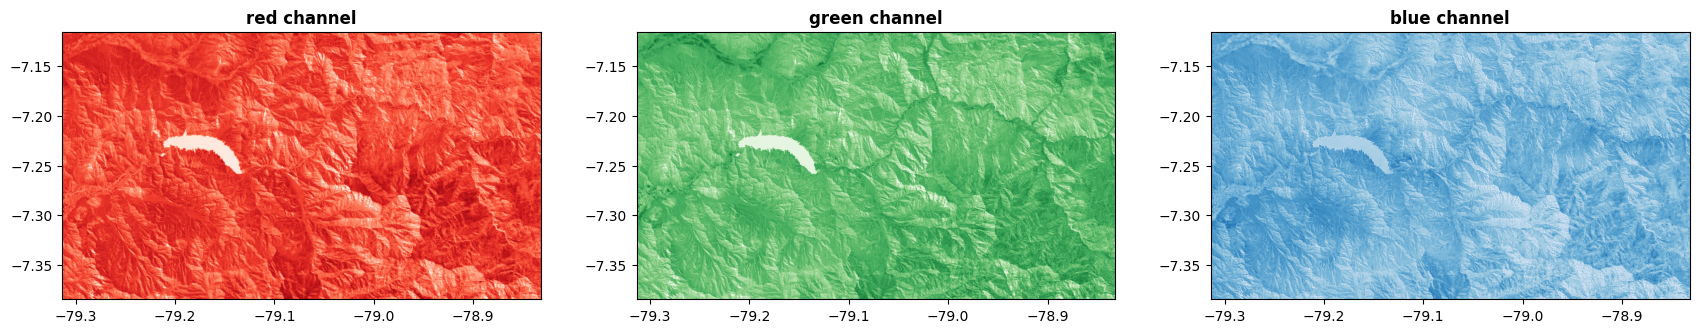

In [18]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7)) 
plot.show((img1, 1), ax=axr, cmap='Reds', title='red channel') 
plot.show((img1, 2), ax=axg, cmap='Greens', title='green channel') 
plot.show((img1, 3), ax=axb, cmap='Blues', title='blue channel')

((1, 2, 3),
 (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>),
 ('uint8', 'uint8', 'uint8'))

In [12]:
img2 = rasterio.open('./Data Examen 3/Ex_1/Rst/landsatImage_edges2.tif')
import rasterio.plot as rplt
fig, ax = plt.subplots()
rplt.show(img2, ax=ax, cmap='viridis')
plt.title('Imagen Landsat')

Text(0.5, 1.0, 'Imagen Landsat')

In [24]:
# 2. Obtener gráficas usando Canny filter con 02 valores de sigma.
redBand, greenBand, blueBand = img1.read(1), img1.read(2), img1.read(3)
redBand = np.float32(redBand)
greenBand = np.float32(greenBand)
blueBand = np.float32(blueBand)

fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(redBand, cmap='viridis')  # Mostrar la imagen con un mapa de colores
cbar = fig.colorbar(im, ax=ax, orientation='vertical')  # Asociar el colorbar al objeto im
cbar.set_label('Value Range')  # Etiqueta del colorbar

plt.title('Red Band Visualization')
plt.show()



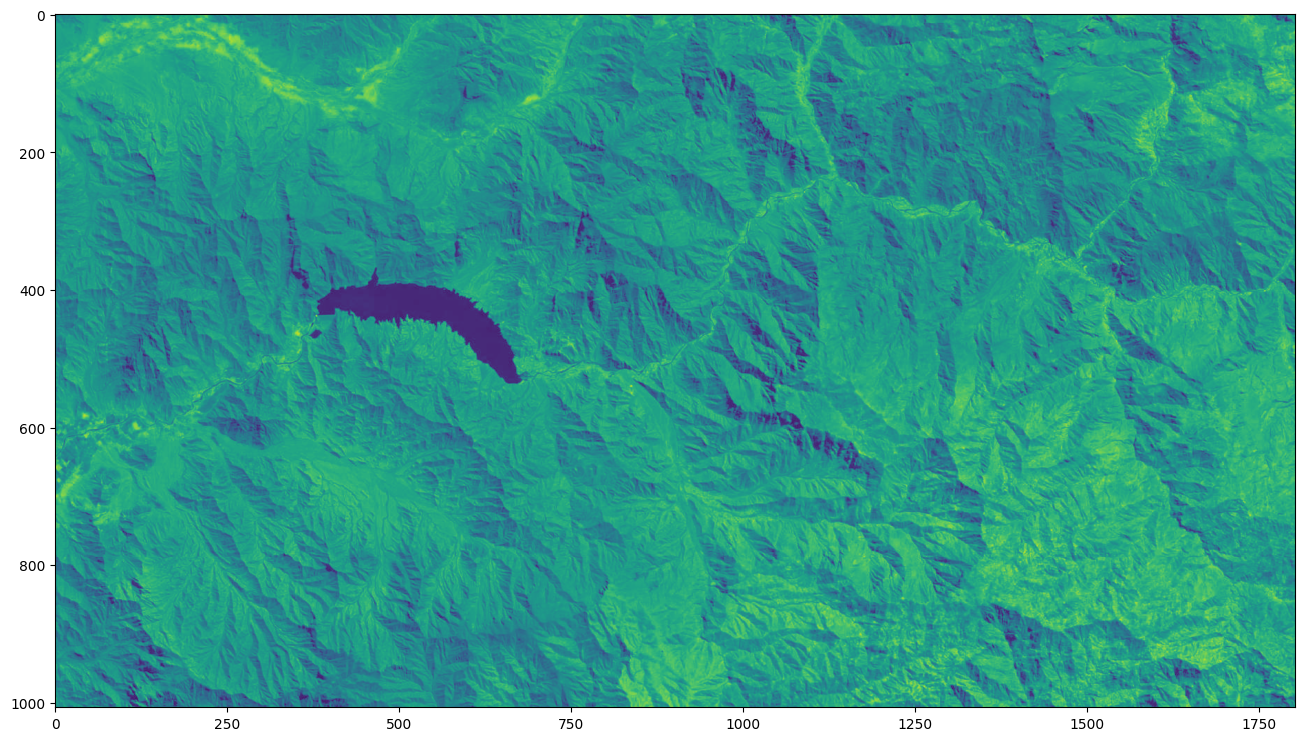

In [26]:
redBand, greenBand, blueBand = img1.read(1), img1.read(2), img1.read(3) 
  
#change data type 
redBand = np.float32(redBand) 
greenBand = np.float32(greenBand) 
blueBand = np.float32(blueBand) 
  
fig, ax = plt.subplots(figsize=(16,12)) 
plt.imshow(greenBand) 

In [28]:
# fix green band 
#greenBand[greenBand<=0] = 10 
  
#calculate hatariIndex 
hatariIndex = np.zeros(blueBand.shape) 
  
hatariIndex[ (redBand < 0.4 * (greenBand+blueBand)) & (redBand >40)] = 1 
  
fig, ax = plt.subplots(figsize=(16,12)) 
plt.imshow(hatariIndex) 
plt.colorbar(shrink=0.5)

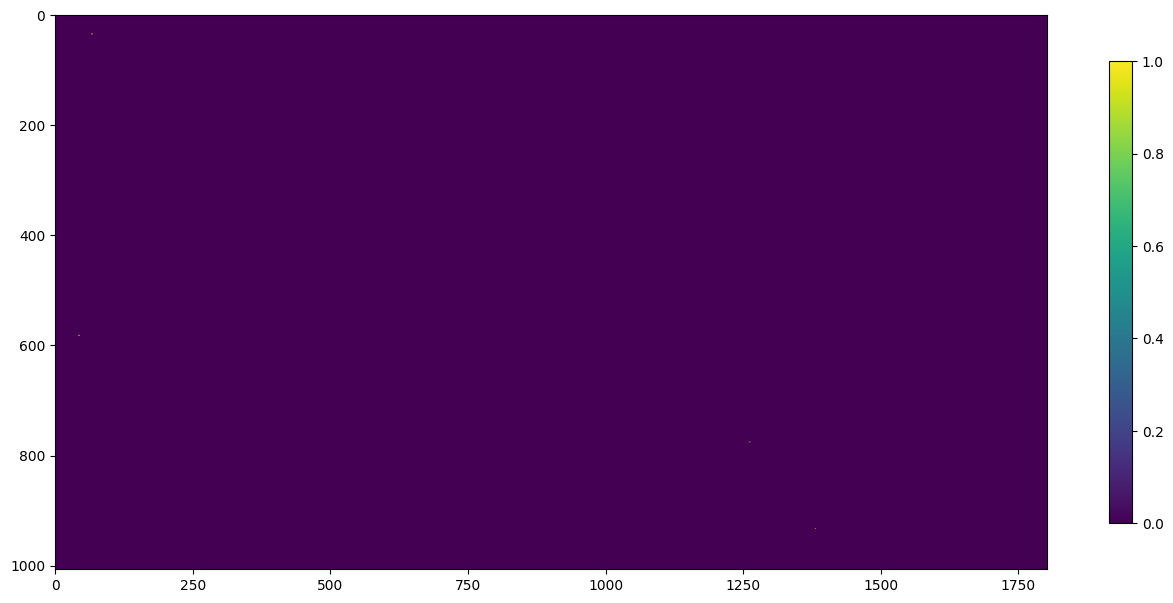

In [ ]:
# fix green band 
greenBand[greenBand<=0] = 10 
  
#calculate hatariIndex 
hatariIndex = np.zeros(blueBand.shape) 
  
hatariIndex[ (redBand < 0.4 * (greenBand+blueBand)) & (redBand >40) & (greenBand >80) ] = 1 
  
fig, ax = plt.subplots(figsize=(16,12)) 
plt.imshow(hatariIndex) 
plt.colorbar(shrink=0.5)

In [ ]:


# 3. Obtener una gráfica que muestra la delimitación del cuerpo de agua.
# 4. Obtener una gráfica de la imagen total (OlivoTotal).
# 5. Representación mediante una gráfica de los puntos cluster luego de haber realizado los algoritmos birch.
# 6. Indicar  el número de puntos interpretados.
# 7. Representar mediante una gráfica la evolución de suelo a escala de cuenca durante 100 mil años usando los mismo parámetros de los componentes fluviales, hillslope y uplift del ejercicio desarrollado en la Sesion 02 de Módulo 06.
# 8. Indicar la máxima y mínima elevación del resultado.
# 9. Obtener la gráfica de la superficie del agua.
# 10. Obtener la gráfica de las velocidades.